# Chapter 4 - NumPy Basics: Arrays and Vectorized Computation

In [136]:
import numpy as np
import matplotlib.pyplot as plt

### Speed Test: numpy vs list

In [2]:
arr = np.arange(1000000)
lst = list(range(1000000))
%time for _ in range(10): arr2 = arr * 2
%time for _ in range(10): lst2 = [x * 2 for x in lst]

CPU times: user 8.99 ms, sys: 6.11 ms, total: 15.1 ms
Wall time: 15.4 ms
CPU times: user 506 ms, sys: 7.48 ms, total: 513 ms
Wall time: 513 ms


### N-Dimensional Arrays

In [3]:
data = np.random.randn(2,3)
data

array([[-1.28645552, -0.56934593,  1.09088526],
       [-1.28291639, -0.38029074,  1.90547602]])

In [4]:
data // 10 # can add, subtract, multiply, etc on all elements

array([[-1., -1.,  0.],
       [-1., -1.,  0.]])

In [5]:
data.shape # use to obtain array dimensions

(2, 3)

In [9]:
data.dtype # use to obtain data type

dtype('float64')

- In most cases dtypes provide a mapping directly onto an underlying disk or memory representation, which makes it easy to read and write binary streams of data to disk and also to connect to code written in a low-level language like C or Fortran.

In [10]:
data.astype(np.float16) # use astype to convert between data types

array([[-1.286 , -0.5693,  1.091 ],
       [-1.283 , -0.3804,  1.905 ]], dtype=float16)

In [7]:
a = np.array([0,2,4,6,8]) # how to create an array
b = np.array([[0,2,4],[1,3,5]]) # and a 2D array (2x3 matrix)
c = np.zeros(10) # and a vector of 10 zeros

### Arithmetic with NumPy Arrays

In [13]:
arr = np.array([[1.,2.,3.],[4.,5.,6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [16]:
arr * arr # operations between equal size arrays apply them element-wise

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [19]:
arr * .5 # operations with scalars apply the type to all elements

array([[0.5, 1. , 1.5],
       [2. , 2.5, 3. ]])

In [21]:
data > np.ones((2,3)) # use relational ops like so

array([[False, False,  True],
       [False, False,  True]])

### Indexing and Slicing

In [23]:
arr[0] # index an array

array([1., 2., 3.])

In [36]:
arr[1,1] # index a 2D array

5.0

In [32]:
arr[0][:2] # slice an array as in Python

array([1., 2.])

In [34]:
arr[0][1:] = 0 # assignment is applied to entire slice
arr # array slices are views of the original array (not copied)

array([[1., 0., 0.],
       [4., 5., 6.]])

In [43]:
three_d = np.random.randn(2,2,2) # create a 3D array
three_d

array([[[ 0.91787055, -1.40768685],
        [ 0.47578585,  0.6420921 ]],

       [[ 0.45860329, -0.06132117],
        [ 0.20729475,  1.94052016]]])

In [45]:
three_d[0,1] # index into high dimensional arrays as needed

array([0.47578585, 0.6420921 ])

In [54]:
three_d[:,:,1:] # select the 2nd element in the lowest dimension
# slicing always retains the shape of an array

array([[[-1.40768685],
        [ 0.6420921 ]],

       [[-0.06132117],
        [ 1.94052016]]])

### Boolean Indexing

- Idea : Use an array of booleans as indices into an array with the same dimensions(where True == inclusion)

In [65]:
nums = np.random.randn(5)
nums

array([ 0.54885263,  0.83672361, -0.63743574, -1.29899679, -0.69054437])

In [66]:
bools = np.array([True, True, False, False,  True]) # can use any boolean condition as index
nums[bools] # be careful: indexing with booleans will not fail if boolean is too long/short

array([ 0.54885263,  0.83672361, -0.69054437])

In [67]:
nums[~bools] # can use a tilde ~ to obtain the opposite

array([-0.63743574, -1.29899679])

- Using boolean indexing always creates a copy of the array data. 
- Use & and | on boolean arrays instead of 'and' and 'or'

In [71]:
nums[nums < 0] # select negatives use a condition on array values as indices into that array

array([-0.63743574, -1.29899679, -0.69054437])

### Fancy Indexing

In [77]:
matrix = np.random.randn(4,4) // 1
matrix

array([[-1.,  1., -1., -1.],
       [ 0., -1.,  0., -1.],
       [ 1., -1., -3.,  0.],
       [-1.,  0., -1., -2.]])

In [78]:
matrix[[0,2,3]] # can use an array of integers as indices into a higher dimensional array

array([[-1.,  1., -1., -1.],
       [ 1., -1., -3.,  0.],
       [-1.,  0., -1., -2.]])

In [84]:
matrix[[1],[0,2]] # can index into by multiple dimensions like this

array([0., 0.])

- fancy indexing also always produces a copy of the data
- the result is always 1-D

### Transposing Arrays and Swapping Axes

- transposing arrays returns a view and does not copy data

In [90]:
arr = np.arange(20).reshape(4,5) # reshape here requires an equal number of elements between arrays
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [91]:
arr.T # quick T attribute for accessing an array's transpose

array([[ 0,  5, 10, 15],
       [ 1,  6, 11, 16],
       [ 2,  7, 12, 17],
       [ 3,  8, 13, 18],
       [ 4,  9, 14, 19]])

In [92]:
np.dot(arr.T,arr) # T attribute will be very helpful computing dot products

array([[350, 380, 410, 440, 470],
       [380, 414, 448, 482, 516],
       [410, 448, 486, 524, 562],
       [440, 482, 524, 566, 608],
       [470, 516, 562, 608, 654]])

In [97]:
arr3 = arr.reshape((2,2,5)) # change arr from 4x5 to 2x2x5
arr3

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]]])

In [99]:
arr3.transpose((0,2,1)) # here we pass a tuple of dimensions to reorder (swap 2nd and 3rd dimensions)

array([[[ 0,  5],
        [ 1,  6],
        [ 2,  7],
        [ 3,  8],
        [ 4,  9]],

       [[10, 15],
        [11, 16],
        [12, 17],
        [13, 18],
        [14, 19]]])

### Universal Functions: Fast Element-Wise Array Functions

- a *ufunc* is just a function that performs element-wise operations (transformation) on data in arrays

In [101]:
np.sqrt(arr) # simple example of a unary ufunc

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739],
       [3.87298335, 4.        , 4.12310563, 4.24264069, 4.35889894]])

In [102]:
np.add(arr,arr * -1) # simple example of a binary ufunc

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [118]:
quotient, remainder = np.modf(arr) # here modf returns the whole and fractional parts of a float array
quotient

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

- Some unary ufuncs: abs, exp, log, ceil, isnan
- Some binary ufuncs: add, power, mod, equal

### Array-Oriented Programming with Arrays

- Numpy allows us to vectorize operations instead of writing them in loops

In [132]:
data = np.arange(-1,1,.1)
data

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

In [142]:
x, y = np.meshgrid(data,data) #meshgrid takes 2 1D arrays and gives @ 2D matrices of all pairs in the arrays
z = np.sqrt(x ** 2 + y ** 2) # lets visualize this function

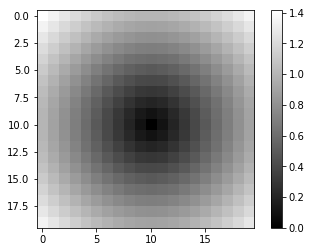

In [143]:
plt.imshow(z,cmap=plt.cm.gray); plt.colorbar() # plot the result

### Expressing Conditional Logic as Array Operations
- the numpy.where function is a  vectorized version of Pythons ternary expression

In [154]:
xarr = np.arange(5)
yarr = np.arange(-5,0)
bools = np.random.randn(5) > 0
bools

array([False, False,  True, False,  True])

In [155]:
np.where(bools,xarr,yarr) # where takes item from 1st if True and from 2nd if False

array([-5, -4,  2, -2,  4])

In [157]:
np.where(xarr > 2, 0 ,xarr) # can set values only on True or only on False too

array([0, 1, 2, 0, 0])

### Mathematical and Statistical Methods
- aggregations(reductions) such as sum, mean, and std will compute statistics about an array or dimesnion
- extra methods: argmin, argmax, var, cumprod, min, max

In [163]:
rarr = np.arange(16).reshape(4,4)
rarr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [164]:
rarr.mean() # calculates the mean of all elements

7.5

In [165]:
rarr.sum(axis=0) # can provide an axis to operate on axis=0 means aggregate the columns)

array([24, 28, 32, 36])

In [167]:
sarr = np.arange(6)
sarr.cumsum() # cumsum provides intermediate results of the sum operation on the array

array([ 0,  1,  3,  6, 10, 15])

### Methods for Boolean Arrays

In [174]:
bools.sum() # can call sum on booleans to get the number of Trues

2

In [171]:
bools.any() # any and all work as they do in Python

True

### Sorting
- np.sort() returns a copy while the array method sort sorts in place

In [178]:
narr = np.random.randn(3,4)
narr

array([[ 0.78817261, -0.66322963,  0.08774905, -0.24699645],
       [ 0.67150294,  0.87562565,  0.09780704, -2.11089178],
       [ 0.66820027, -0.91867297,  0.68852925, -0.0220994 ]])

In [183]:
narr.sort(1) # can sort arrays along any dimension (here we sort along the rows)
narr

array([[-2.11089178, -0.24699645,  0.08774905,  0.68852925],
       [-0.91867297, -0.0220994 ,  0.66820027,  0.78817261],
       [-0.66322963,  0.09780704,  0.67150294,  0.87562565]])

### Unique and Other Set Logic
- extra methodes include: intersect1d, union1d, setdiff1d

In [184]:
ints = np.array([0,2,4,3,2,2,1,0])
np.unique(ints) # unique method sorts and returns unique elements from a 1D array

array([0, 1, 2, 3, 4])

In [186]:
np.in1d(ints,[1,3,5,7]) # in1d checks if elements of one array are members of another

array([False, False, False,  True, False, False,  True, False])

### File Input and Output with Arrays
- arrays are saved by default in uncompressed raw binary format as .npy files

In [205]:
saveme = np.arange(10)
metoo = np.arange(5)

In [201]:
np.save('1_to_10',saveme)

In [202]:
%ls

1_to_10.npy        datasets/            pfda_ch4.ipynb
ch2_project.ipynb  ml_dis_schedule.pdf  README.md


In [203]:
np.load('1_to_10.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [206]:
np.savez('array_archive.npz', a=saveme,b=metoo) # save them in an archive for easier retrieval

In [208]:
some_arrs = np.load('array_archive.npz') # a loaded archive acts as a dict for its contents
some_arrs['b'] # b is lazy loaded when it is needed

array([0, 1, 2, 3, 4])

In [209]:
# np.savez_compressed('arrays_compressed.npz') # can save them in compressed form as well

### Linear Algebra
- utils included for multiplication, decompositions, determinants, etc
- an asterisk does not perform matrix multiplication in Numpy

In [210]:
x = np.array([[1,2,3],[4,5,6]])
y = np.array([[6,23],[-1,7],[8,9]])
x

array([[1, 2, 3],
       [4, 5, 6]])

In [211]:
y

array([[ 6, 23],
       [-1,  7],
       [ 8,  9]])

In [213]:
x.dot(y) # dot product here, 2x3 * 3x2 = 2x2 (np.dot(x,y) also works fine)

array([[ 28,  64],
       [ 67, 181]])

- numpy.linalg has the standard linear algebra functions: diag, trace, inv, det, eig, pinv, qr, svd

In [227]:
from numpy.linalg import det, qr

In [231]:
X = np.random.randn(4,4)
det(X) # use the det function to compute a determinant

-1.1755864898551005

### Pseudorandom Number Generation
- use np.random in liu of python's random package
- numpy's random sampling is much faster than Python's, which samples one at a time
- Use a seed in the random num generator to get reproducible results
-  other functions include: seed, shuffle, rand, beta, gamma,binomial

In [234]:
norm = np.random.normal(size=(4,4)) # matrix sampled from a normal distribution
norm

array([[-0.08710305, -0.46087681, -0.73987805, -0.14960734],
       [ 0.81240536,  0.06268868,  0.92189   ,  0.932291  ],
       [-0.35492216, -0.26972002,  0.54765973,  0.52233525],
       [ 1.82096234,  1.18507979,  0.96300012, -0.07820594]])

### Example: Random Walks

In [266]:
num_steps = 100
draws = np.random.randint(0,2,size=num_steps) # get 100 random values either 0 or 1
steps = np.where(draws > 0, 1, -1) # determine direction sequence of the 100 steps
walk = steps.cumsum() # sum the steps cumulatively so as to show the path of the walk

In [260]:
walk.min() # see the most negative num the walk reached

-31

In [261]:
walk.max() # the max

1

In [262]:
(np.abs(walk) >= 10).argmax() # find the step number where the walk passed +/- 10

27

In [265]:
walk # the path of the random walk

array([  1,   0,  -1,  -2,  -1,  -2,  -1,   0,   1,   0,  -1,  -2,  -1,
        -2,  -3,  -4,  -3,  -4,  -5,  -6,  -7,  -8,  -7,  -6,  -7,  -8,
        -9, -10, -11, -12, -13, -14, -13, -12, -13, -14, -15, -14, -15,
       -16, -17, -18, -17, -16, -15, -16, -17, -16, -17, -18, -19, -18,
       -19, -18, -19, -20, -19, -18, -17, -16, -17, -18, -19, -18, -19,
       -20, -21, -22, -23, -22, -21, -20, -21, -22, -23, -24, -25, -26,
       -27, -26, -27, -28, -29, -30, -31, -30, -29, -28, -29, -30, -29,
       -30, -31, -30, -29, -28, -29, -30, -29, -30])

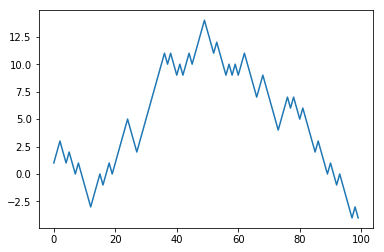

In [267]:
plt.plot(walk[:100]) # graph of the random walk

In [272]:
num_walks = 5000 # now we can try the same thing but 5000 times! now we have a 2D array
num_steps = 1000
draws = np.random.randint(0,2,size=(num_walks,num_steps))
steps = np.where(draws>0,1,-1)
walks = steps.cumsum(1)
walks

array([[ -1,   0,   1, ...,  -4,  -3,  -2],
       [ -1,  -2,  -3, ...,  -6,  -7,  -6],
       [ -1,  -2,  -3, ...,  -8,  -7,  -8],
       ...,
       [  1,   0,  -1, ...,  22,  21,  22],
       [  1,   0,   1, ...,  98,  97,  98],
       [  1,   0,   1, ..., -38, -39, -40]])

In [269]:
walks.max()

119

In [270]:
walks.min()

-112

In [274]:
reach30 = (np.abs(walks)>=30).any(1) # here we check which rows actually reach +/- 30 steps
reach30

array([False, False, False, ..., False,  True,  True])

In [275]:
reach30.sum() # this gives us the num of walks that reached a distance of +/- 30

3453

In [278]:
crossing_times = (np.abs(walks[reach30]) >=30).argmax(1)
crossing_times.mean()

501.7836663770634